In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import av
import os
import numpy as np

In [26]:
def average_video(filename):
    assert os.path.exists(filename)
    container = av.open(filename)
    video = next(s for s in container.streams if s.type == b'video')
    
    frame_sum = np.zeros((video.height, video.width, 3))
    sample_period = 24
    current_frame = 0
    frames_summed = 0
    

    for packet in container.demux(video):
        for frame in packet.decode():
            current_frame += 1
            if current_frame % sample_period == 0:
                frame_sum += frame.to_image()
                frames_summed += 1
    
    return np.array(frame_sum / frames_summed, dtype=np.uint8)

In [32]:
def display(img):
    figure(figsize=(10,10))
    imshow(img)
    axis('off')

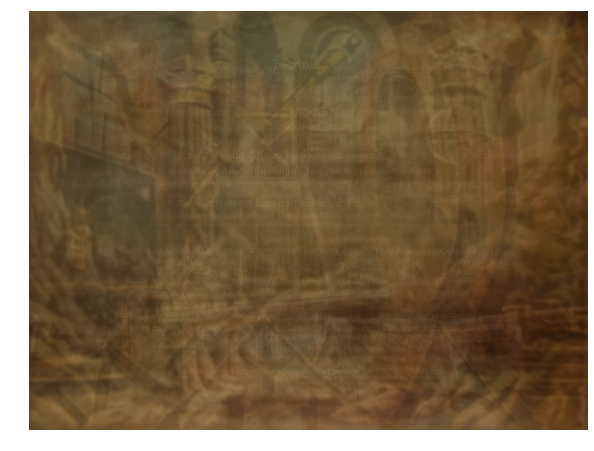

In [33]:
voyage = average_video("Le voyage dans la lune (A trip to the Moon) - 1902-lUAD4lKNDI8.mkv")
display(voyage)

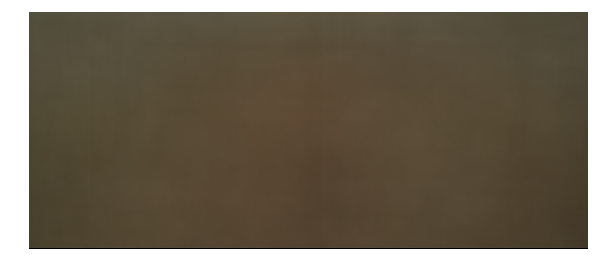

In [34]:
o_brother = average_video("../../Movies/Movies/O Brother, Where Art Thou (2000)/O.Brother.Where.Art.Thou.mp4")
display(o_brother)

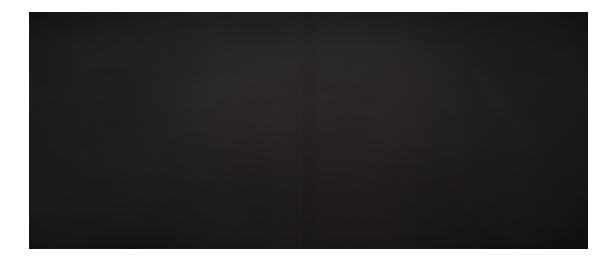

In [35]:
first_contact = average_video("../../Movies/Movies/Star Trek First Contact (1996)/Star.Trek.First.Contact.mp4")
display(first_contact)

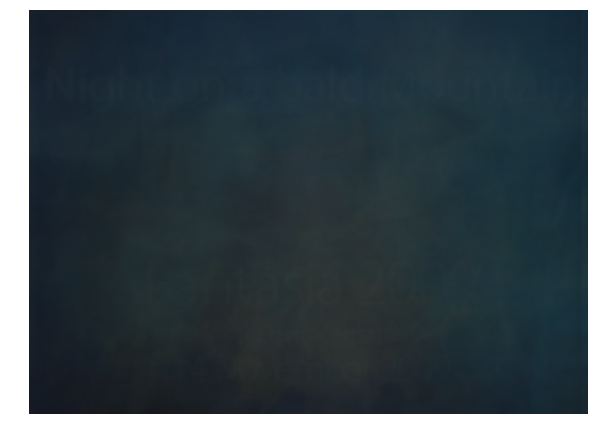

In [36]:
night_on_bald_mountain = average_video("Night On Bald Mountain - Fantasia (1941) (Theatrical Cut)-SLCuL-K39eQ.webm")
display(night_on_bald_mountain)

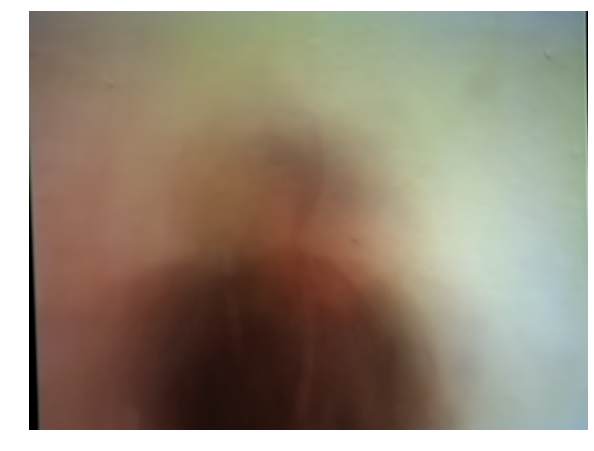

In [37]:
books = average_video("The Books - And I Will Go to Bed at Noon-2nyr7cBh4B4.mp4")
display(books)

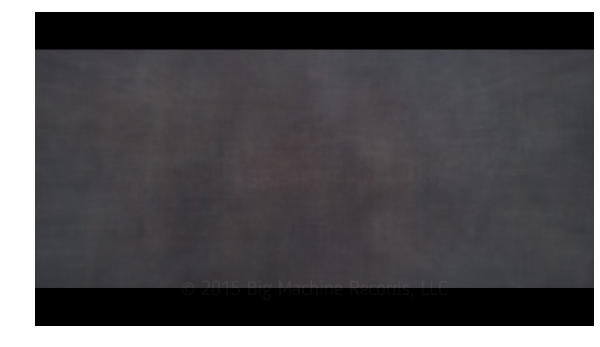

In [38]:
bad_blood = average_video("Taylor Swift - Bad Blood ft. Kendrick Lamar-QcIy9NiNbmo.mkv")
display(bad_blood)